# Bootstrap

The bootstrap is a method which computes a statistic of a dataset and the uncertainty in the population statistic by using repeated sampling with replacement of a data set. We can use the datascience table .sample() method to carry out re-sampling of a table with replacement. What does this mean in practice? It meeans that some of the rows of data may appear twice or more in the re-sampled data and other will be omitted leaving the same number of data points (rows) but, importantly, a new estimate of the statistic. This is demonstrated below with the Old Faithful data investigating the relationship between eruption duration (minutes) and the wait time (minutes) until the next eruption. 

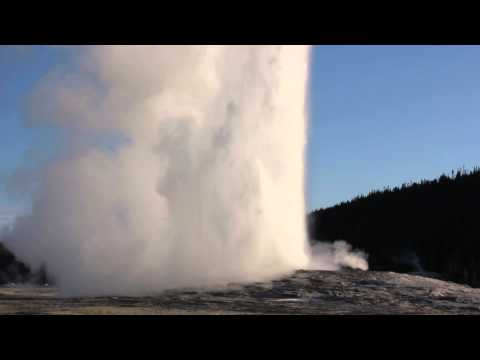

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

In [2]:
from datascience import *
%matplotlib inline
path_data = 'data/'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

## Old Faithful
Use Bootstrap sampling to estimate 95% confidence interval on our estimated slope.

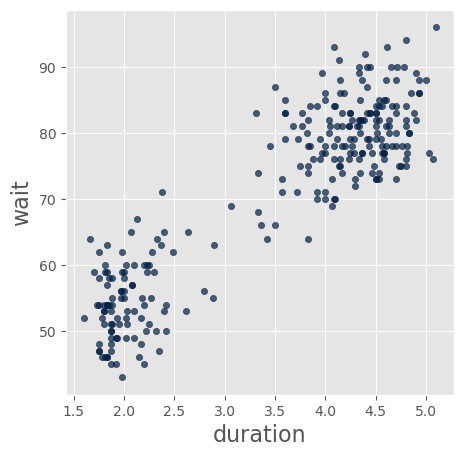

In [3]:
faithful = Table.read_table("data/faithful-new.csv")
faithful.scatter('duration','wait')

### Regression Tools

In [4]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

### Sample the faithful Table

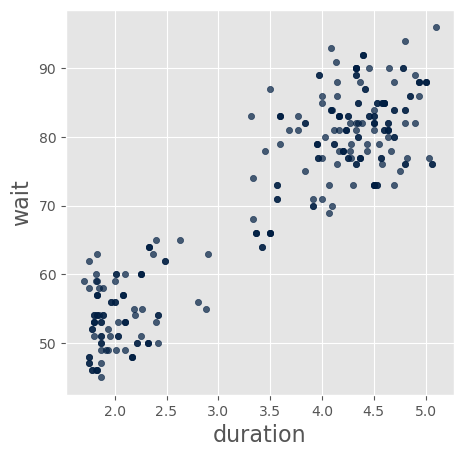

In [5]:
sfaithful = faithful.sample() # Try 20 samples
sfaithful.scatter('duration','wait')

Slope: 10.42 Intercept:  34.44


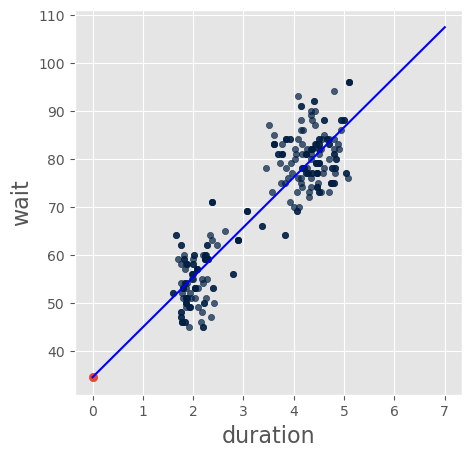

In [6]:
sfaithful = faithful.sample() # Resample the whole Table with replacement
sfaithful.scatter('duration','wait')
slp = slope(sfaithful, 'duration','wait')
inter = intercept(sfaithful,'duration','wait')
print("Slope: %4.2f Intercept:  %4.2f" % (slp, inter))
plt.scatter(0,inter)
xs = [0, 7]
ys = [inter, slp * 7 + inter]
plt.plot(xs,ys, color='blue')
plt.show()

In [7]:
slp = slope(faithful.sample(), 'duration','wait')
print(slp)

10.6658891234


In [ ]:
sample_slope = []
for i in np.arange(10000):
    slp = slope(faithful.sample(), 'duration','wait')
    sample_slope.append(slp)   

In [ ]:
left = percentile(2.5, sample_slope)
right = percentile(97.5, sample_slope)
make_array(left, right)

In [ ]:
slope(faithful, 'duration','wait')

### Confidence Interval (95%)

In [ ]:
CI = (right - left)/2
CI

95% Confidence Interval on slope: 10.3 +/- 0.6

In [ ]:
plt.hist(sample_slope)
plt.scatter(10.73,0, s=300, label='slope',marker='o', 
            c='green',alpha=0.8, edgecolors='blue')
plt.plot([left, right], [0, 0], color='yellow', lw=8, label='Confidence Interval')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.tight_layout()

In [ ]:
sample_intercept = []
for i in np.arange(10000):
    inter = intercept(faithful.sample(), 'duration','wait')
    sample_intercept.append(inter) 
left = percentile(2.5, sample_intercept)
right = percentile(97.5, sample_intercept)
make_array(left, right)

In [ ]:
plt.hist(sample_intercept)
plt.scatter(33.47,0, s=300, label='intercept',marker='o', 
            c='green',alpha=0.8, edgecolors='blue')
plt.plot([left, right], [0, 0], color='yellow', lw=8, label='Confidence Interval')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.tight_layout()

In [ ]:
np.mean(faithful['duration'])